# Predicting Cervical Cancer
Capstone Project #2 for Springboard Data Science

Saatvik Ramisetty

## Project

About 11,000 new cases of invasive cervical cancer are diagnosed each year in the U.S. However, the number of new cervical cancer cases has been declining steadily over the past decades. Although it is the most preventable type of cancer, each year cervical cancer kills about *4,000* women in the U.S. and about *300,000* women worldwide. In the United States, cervical cancer mortality rates plunged by 74% from 1955 - 1992 thanks to increased screening and early detection with the Pap test.


This project can help improve cancer risk detection and recognizing the symptoms that cause cervical cancer in women. Machine Learning plays an important in improving healthcare and understanding cancer and it’s causes.

## Data

Dataset & Research paper available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29) and [Paper](https://pdfs.semanticscholar.org/1c02/438ba4dfa775399ba414508e9cd335b69012.pdf)

The dataset comprises demographic information, habits, and historic medical records of 858 patients. Data covers a wide range of information including details like number of sexual partners, number of years the patient has been smoking for, number of pregnancies and if the patient has STDs.

## Methodology

We're trying to understand what are the factors that lead up to biopsy. We need a systematic approach of exploratory data analysis and modelling.

### Libraries

1. **Pandas**
    - data loading, wrangling, cleaning, and manipulation
    - feature selection and engineering
    - descriptive statistics
    
2. **numpy**
    - array data structure, the primary input for classifiers
    - model comparison
    - matrix manipulation
    
3. **scipy,sci-kit**
    - Normalization and standardization
    
4. **Seaborn and Matplotlib** for visualization

In [41]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Getting working directory

import os
cwd = os.getcwd()
cwd

'/Users/saatvik/My Jupyter Notebooks/Predicting-Cervical-Cancer/Capstone2'

## Data Observation & Pre-Processing

Data is imported from the excel spreadsheet provided on the website. It is important to tackle the missing information which is done by converting the objects into numeric values and separating the categorical and numerical variables.

Missing values have '?' which are replaced by NaN to understand the number of missing values. All the continuous variables are corrected by using "Median" and dummy variables are used for categorical variables.

In [42]:


#df_full = pd.read_csv('C:/Users/sramisetty/Documents/GitHub/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')
#train = pd.read_csv('C:/Users/sramisetty/Documents/GitHub/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')

df_full = pd.read_csv('/Users/saatvik/My Jupyter Notebooks/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [43]:
df_full.iloc[0]

Age                                     18
Number of sexual partners              4.0
First sexual intercourse              15.0
Num of pregnancies                     1.0
Smokes                                 0.0
Smokes (years)                         0.0
Smokes (packs/year)                    0.0
Hormonal Contraceptives                0.0
Hormonal Contraceptives (years)        0.0
IUD                                    0.0
IUD (years)                            0.0
STDs                                   0.0
STDs (number)                          0.0
STDs:condylomatosis                    0.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               0.0
STDs:Hepati

In [44]:
df_fullna = df_full.replace('?', np.nan)
df_fullna.isnull().sum() #Check the number of NAs in each column

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [45]:
df_fullna[df_fullna['STDs'].apply(lambda x: type(x)) != float].isnull().sum()

Age                                     0
Number of sexual partners              14
First sexual intercourse                6
Num of pregnancies                     47
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    16
IUD (years)                            16
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [46]:
df_fullna = df_fullna[df_fullna['STDs'].notnull()]
df_fullna.isnull().sum()

Age                                     0
Number of sexual partners              14
First sexual intercourse                6
Num of pregnancies                     47
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    16
IUD (years)                            16
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [47]:
df_fullna.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)
## Too many missing values

In [48]:
df_fullna = df_fullna[df_fullna['IUD'].notnull()]
df_fullna = df_fullna[df_fullna['Hormonal Contraceptives'].notnull()]
df_fullna = df_fullna[df_fullna['Smokes'].notnull()]

df_fullna.isnull().sum()

Age                                    0
Number of sexual partners             14
First sexual intercourse               6
Num of pregnancies                    41
Smokes                                 0
Smokes (years)                         0
Smokes (packs/year)                    0
Hormonal Contraceptives                0
Hormonal Contraceptives (years)        0
IUD                                    0
IUD (years)                            0
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV        

In [49]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
for feature in numerical_df:
    print(feature,'',df_fullna[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(df_fullna[feature].convert_objects(convert_numeric=True).mean(),1)
    df_fullna[feature] = df_fullna[feature].fillna(feature_mean)

Age  27.258953168044076
Number of sexual partners  2.514044943820225
First sexual intercourse  17.094444444444445
Num of pregnancies  2.318248175182482
Smokes (years)  1.2432461460041317
Smokes (packs/year)  0.4638162915428375
Hormonal Contraceptives (years)  2.2349371915179073
IUD (years)  0.5144214876033059
STDs (number)  0.15977961432506887


In [50]:
df_fullna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 857
Data columns (total 34 columns):
Age                                   726 non-null int64
Number of sexual partners             726 non-null object
First sexual intercourse              726 non-null object
Num of pregnancies                    726 non-null object
Smokes                                726 non-null object
Smokes (years)                        726 non-null object
Smokes (packs/year)                   726 non-null object
Hormonal Contraceptives               726 non-null object
Hormonal Contraceptives (years)       726 non-null object
IUD                                   726 non-null object
IUD (years)                           726 non-null object
STDs                                  726 non-null object
STDs (number)                         726 non-null object
STDs:condylomatosis                   726 non-null object
STDs:cervical condylomatosis          726 non-null object
STDs:vaginal condylomatosi

In [51]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [52]:
cancer_df_features = df_fullna.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)

cancer_df_label = pd.DataFrame(data=df_fullna['Hinselmann'])
cancer_df_label['Schiller'] = df_fullna['Schiller']
cancer_df_label['Citology'] = df_fullna['Citology']
cancer_df_label['Biopsy'] = df_fullna['Biopsy']

def cervical_cancer(cancer_label):
    
    hil, sch, cit, bio = cancer_label
    
    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)

Value counts of each target variable: 0    633
1     36
3     32
2     20
4      5
Name: cervical_cancer, dtype: int64
Final feature vector shape: (726, 30)
Final target vector shape (726,)


In [53]:
df_fullna['screening'] = np.where((df_fullna['Hinselmann'] == 0) & (df_fullna['Schiller'] == 0) & (df_fullna['Citology'] == 0) & (df_fullna['Biopsy'] == 0), 0 , 1)

In [54]:
df_fullna = df_fullna.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)

In [55]:
list(df_fullna)[1:len(list(df_fullna))]

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'screening']

In [56]:
df_fullna.screening.value_counts()

0    633
1     93
Name: screening, dtype: int64

In [84]:
# define X and y
feature_cols = list(df_fullna)[1:len(list(df_fullna))-1]

In [85]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = df_fullna[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = df_fullna.screening

In [86]:
X

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,1.0,17.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1
10,3.0,26.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [87]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, random_state=0, test_size = 0.5)


In [88]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics

sm = SMOTE(random_state = 12, ratio = 1)
train_features_res, train_labels_res = sm.fit_sample(train_features, train_labels)

Increase test_size from 0.1 to 0.5, maybe the test size is too small?

In [89]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(train_features_res, train_labels_res)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [90]:
print('Validation Results')
print(clf_rf.score(test_features, test_labels))
print(recall_score(test_labels, clf_rf.predict(test_features)))
print(metrics.f1_score(test_labels,clf_rf.predict(test_features)))
print(metrics.accuracy_score(test_labels,clf_rf.predict(test_features)))

Validation Results
0.8099173553719008
0.19148936170212766
0.2068965517241379
0.8099173553719008


In [91]:
test_labels.value_counts()

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
test_labels.mean()

0.12947658402203857

In [92]:
# calculate the percentage of zeros
1 - test_labels.mean()

0.8705234159779615

In [93]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(test_labels.mean(), 1 - test_labels.mean())

0.8705234159779615

This means that a dumb model that always predicts 0 would be right 87% of the time

This shows how classification accuracy is not that good as it's close to a dumb model
It's a good way to know the minimum we should achieve with our models

In [94]:
print(metrics.confusion_matrix(test_labels,clf_rf.predict(test_features)))

#Skewed

[[285  31]
 [ 38   9]]


In [99]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(test_labels,clf_rf.predict(test_features))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[285  31]
 [ 38   9]]


In [100]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
clf_rf.predict(test_features)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
# print the first 10 predicted probabilities of class membership
clf_rf.predict_proba(test_features)[0:10]

array([[0.8 , 0.2 ],
       [0.96, 0.04],
       [0.72, 0.28],
       [0.6 , 0.4 ],
       [0.84, 0.16],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.92, 0.08]])

In [102]:
clf_rf.predict_proba(test_features)[0:10, 1]

array([0.2 , 0.04, 0.28, 0.4 , 0.16, 0.12, 0.  , 0.32, 0.32, 0.08])

In [103]:
# store the predicted probabilities for class 1
y_pred_prob = clf_rf.predict_proba(test_features)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

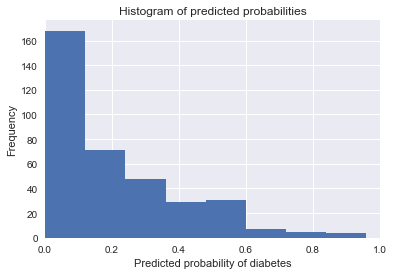

In [104]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

We can see from the first bar
Most of observations have probability from 0.2 to 0.3
Small number of observations with probability > 0.1
This is below the threshold of 0.5
Most would be predicted "0" in this case
Solution
Decrease the threshold for predicting diabetes
Increase the sensitivity of the classifier
This would increase the number of TP
More sensitive to positive instances




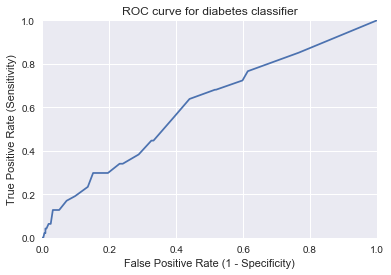

In [105]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(test_labels, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [77]:
#import PipeLine, SelectKBest transformer, and RandomForest estimator classes
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

#initialize randomforest and selectKbest
selector = SelectKBest(k=100)
clf = RandomForestClassifier()

#place SelectKbest transformer and RandomForest estimator into Pipeine
pipe = Pipeline(steps=[('selector', selector), ('clf', clf)])
                     

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
parameters = {'n_estimators':[20, 50, 100, 200], 'max_samples_split': [2, 5, 10, 20] }

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
g_search = GridSearchCV(pipe, parameters)

#Fit the grid search object to the training data and find the optimal parameters using fit()
g_fit = g_search(train_features_res, train_labels_res)

#Get the best estimator and print out the estimator model
best_clf = g_fit.best_estimator_
print (best_clf)

#Use best estimator to make predictions on the test set
best_predictions = best_clf.predict(test_features)                   

TypeError: 'GridSearchCV' object is not callable